Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;

- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;

- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [4]:
df_2019 = pd.read_csv('2019.csv')

Для анализа решила взять наиболее актуальные данные, то есть за 2019 год.

In [5]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
import seaborn as sns

Сначала посмотрим, как связаны между собой различные признаки в наборе данных.

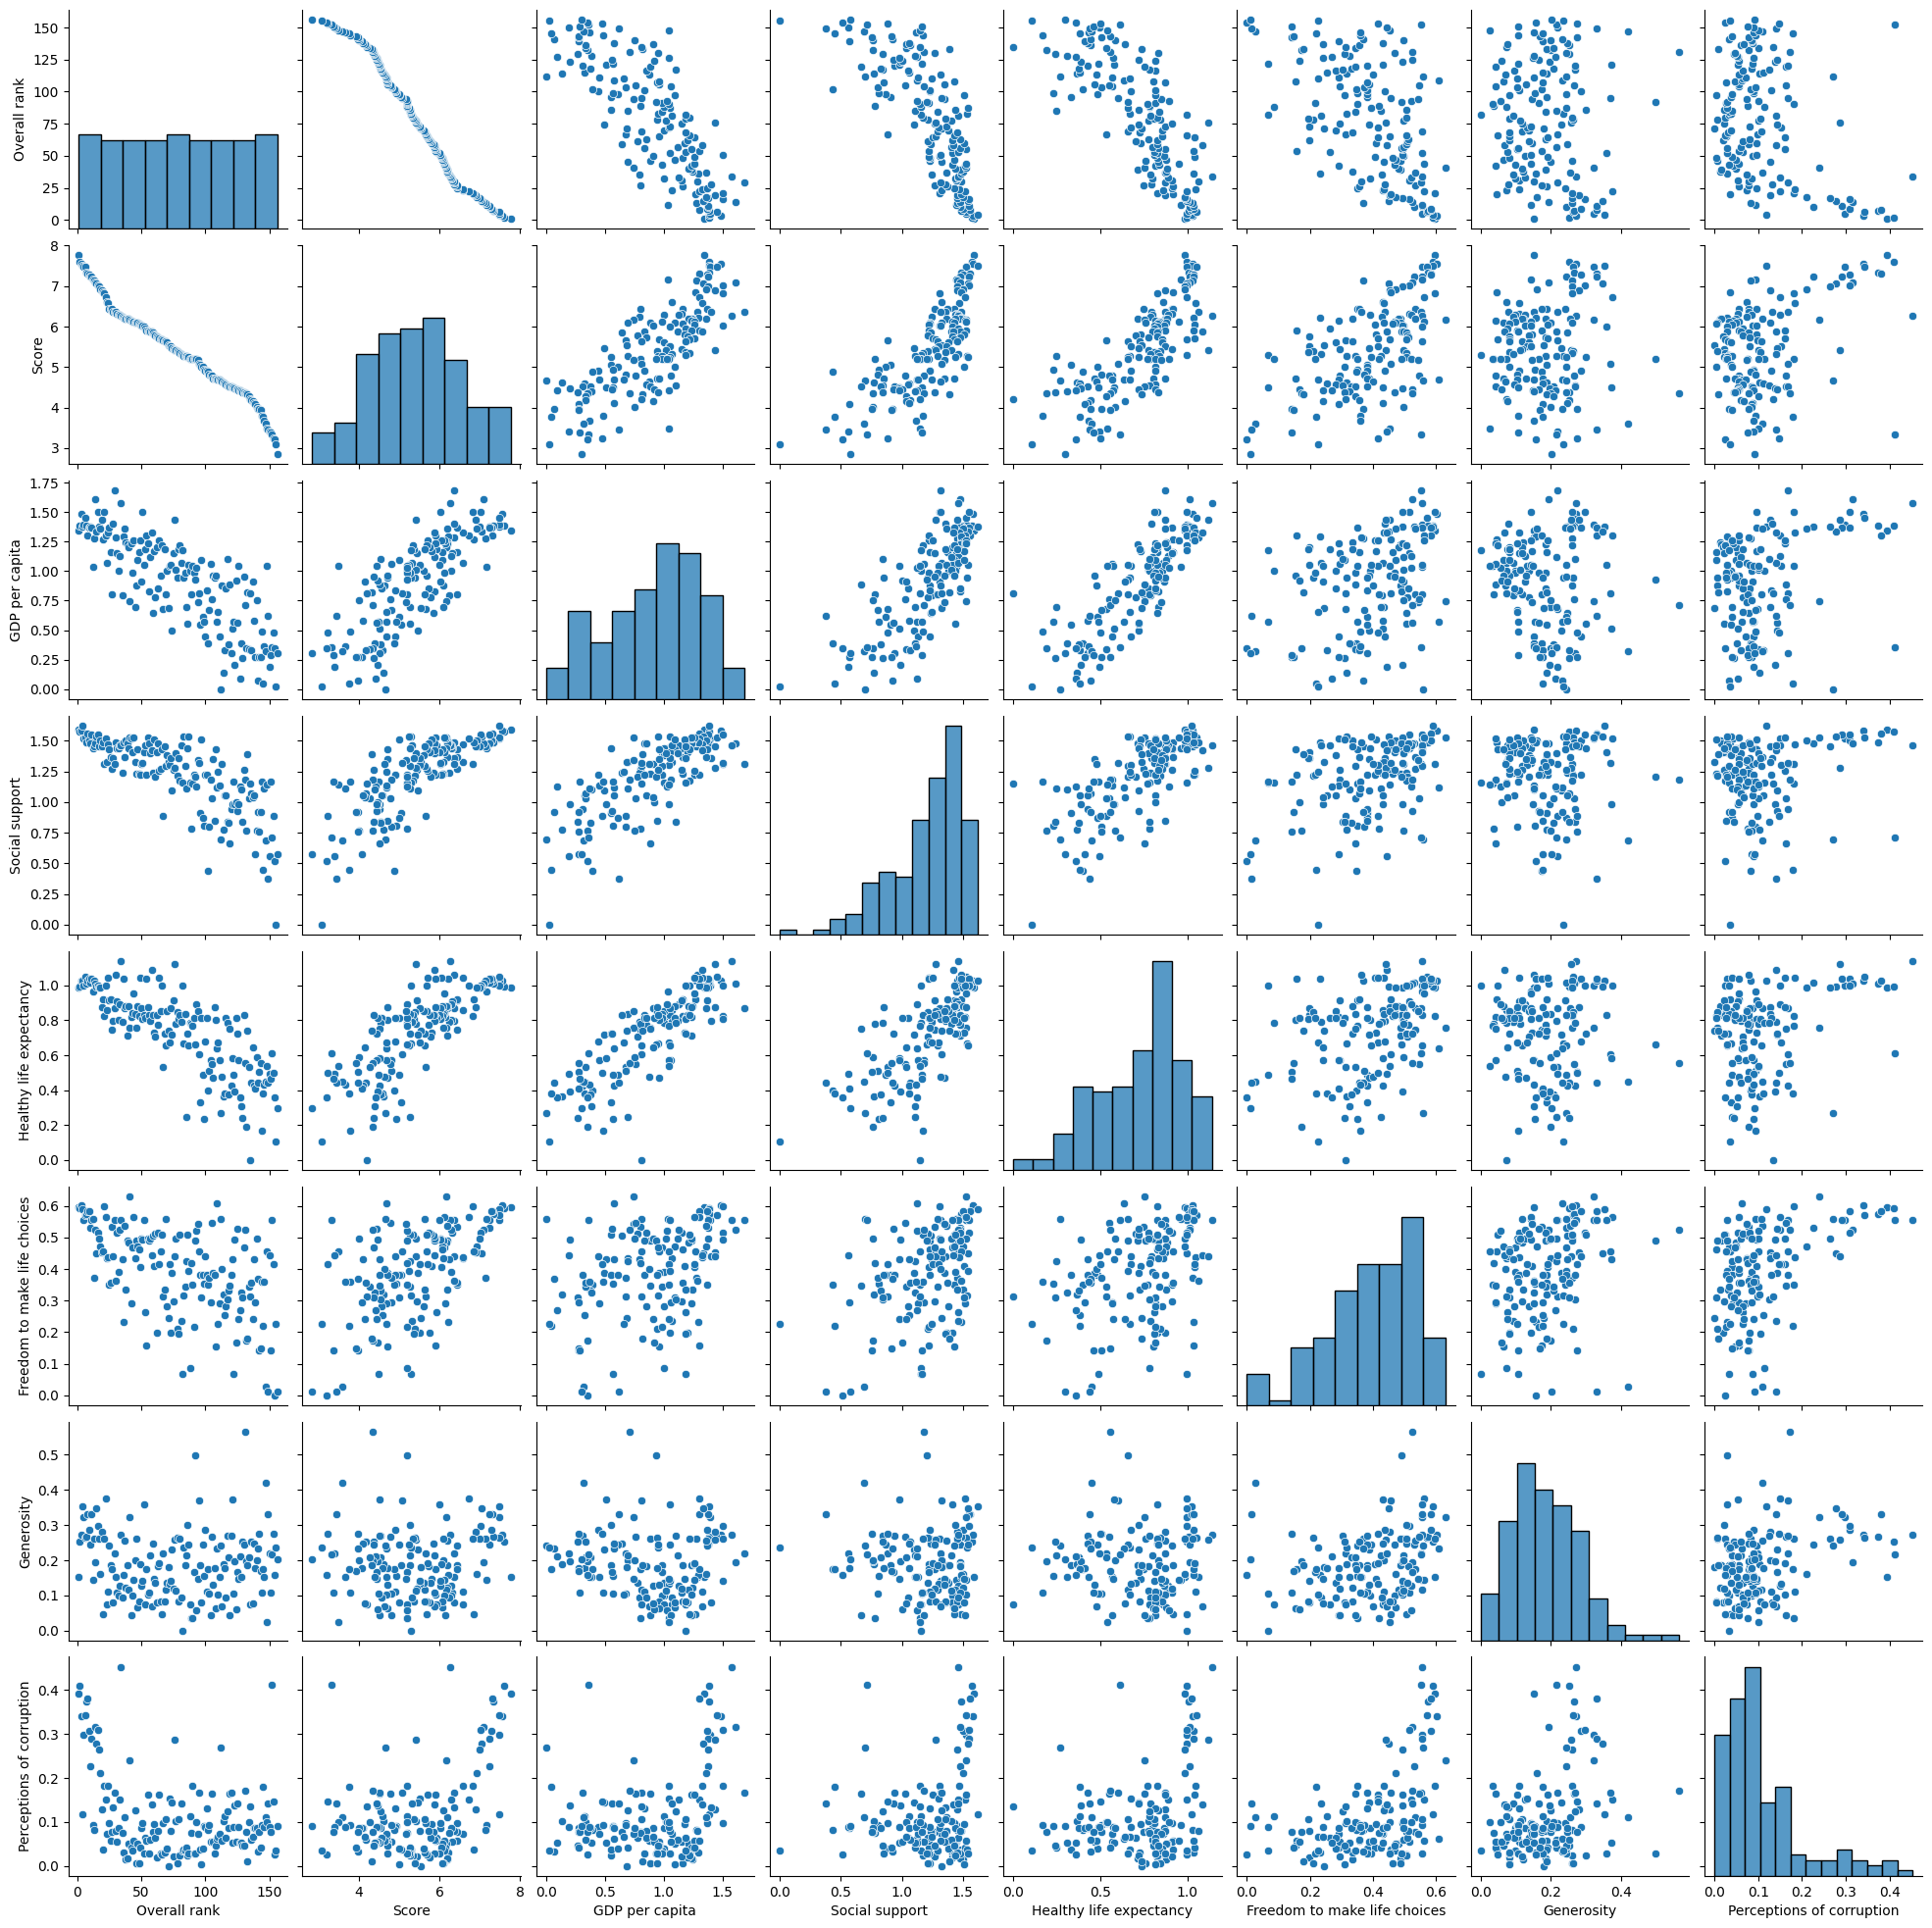

In [8]:
sns.pairplot(df_2019)

1. Чем выше показатель "Score", тем выше показатель "Rank".
2. Чем выше показатель "GDP per capita", тем выше показатель "Rank". То есть по данному графику отчетливо видно, что доход на душу населения напрямую влияет на уровень счастья.  
3. Аналогичные наблюдения можно сделать с показателями Social support и Healthy life expectancy, из чего можно сделать вывод, что на уровень счастья населения влияют качество социальной поддержки и ожидаемая продолжительность жизни.
4. В странах с низким рейтингом счастья чаще встречаются выбросы по показателю "Generosity". Как мы выяснили ранее, чем ниже доход на душу населения, тем ниже уровень счастья в странах. Из полученных данных можно прийти к выводу, что в бедных странах можно наблюдать более выраженные явления щедрости.
5. Диапазон по показателю "Freedom to make life choices" более узок у стран с высоким рейтингом уровня счастья, что может свидетельствовать о меньшем уровне расслоения общества. 

Скорее всего, с heatmap я что-то не так делала, потому что у меня определилась лишь зависимость между номером строки и рейтингом, что в общем-то и так очевидно :)
Столбец со строкой добавить не получилось, так как появлялась ошибка в типе данных (нельзя перевести string во float)

upd:

Я уже поняла, что дело в том, что все показатели у меня являются численными. Были мысли создать новый датафрейм, где я самостоятельно бы разделила страны на категории (высокая, средняя, низкая), но я не была уверена в целесообразности и эффективности такого метода.

<Axes: >

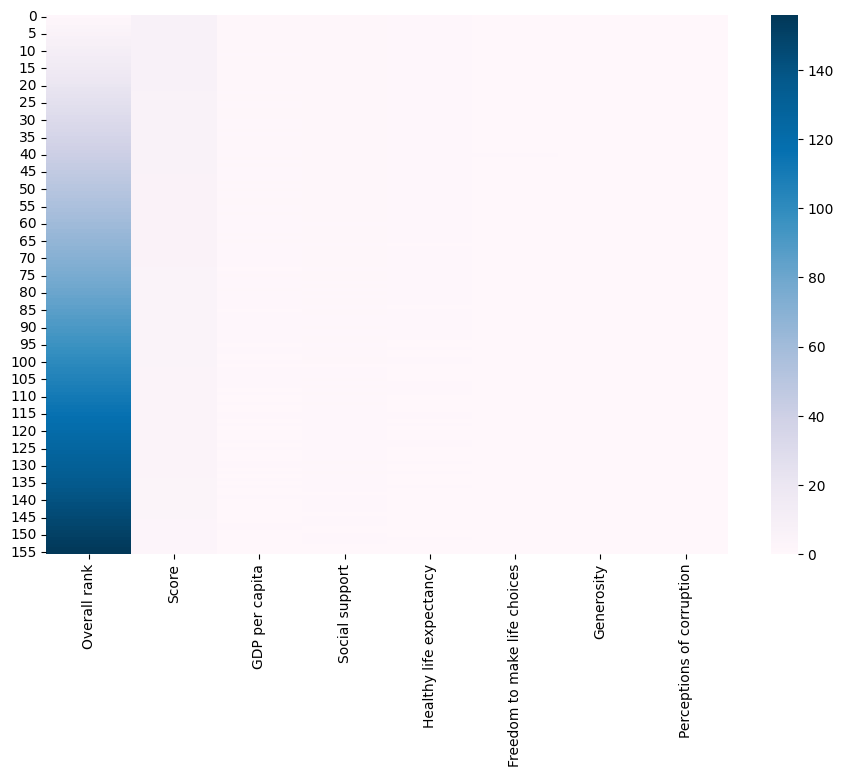

In [9]:
sns.heatmap(df_2019[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']], cmap='PuBu')

С boxplot аналогичная ситуация, все показатели являются численными.
Чтобы увидеть какую-то стойкую тенденцию, нужно определиться с категориями (по региону, по рейтингу и т.д.)
Для тренировки сделала график по распределению дохода на душу населения в топ-3 странах.

In [11]:
top_3 = df_2019.loc[df_2019['Country or region'].isin(['Finland', 'Denmark', 'Norway'])]
top_3

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


<Axes: title={'center': 'Распределение дохода на душу населения'}>

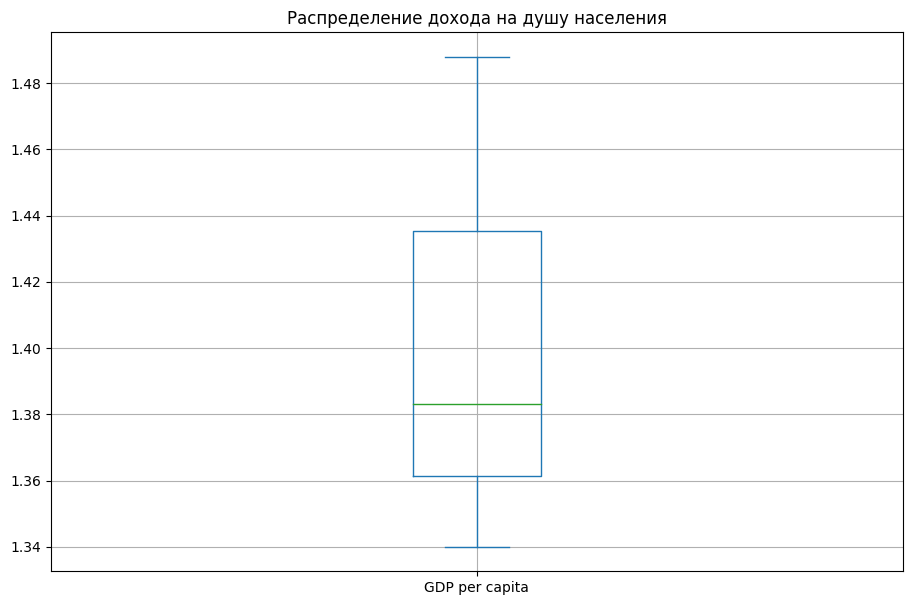

In [12]:
top_3['GDP per capita'].plot(kind='box',
                   title='Распределение дохода на душу населения', grid=True)

Для удобства решила сделать отдельный график для того, чтобы увидеть взаимосвязь между доходом на душу населения и уровнем счастья в стране.
Чем выше показатель "GDP per capita", тем выше показатель "Rank", то есть доход на душу населения напрямую влияет на уровень счастья. 

<Axes: title={'center': 'Зависимость между доходом на душу населения и уровнем счастья в стране'}, xlabel='Overall rank', ylabel='GDP per capita'>

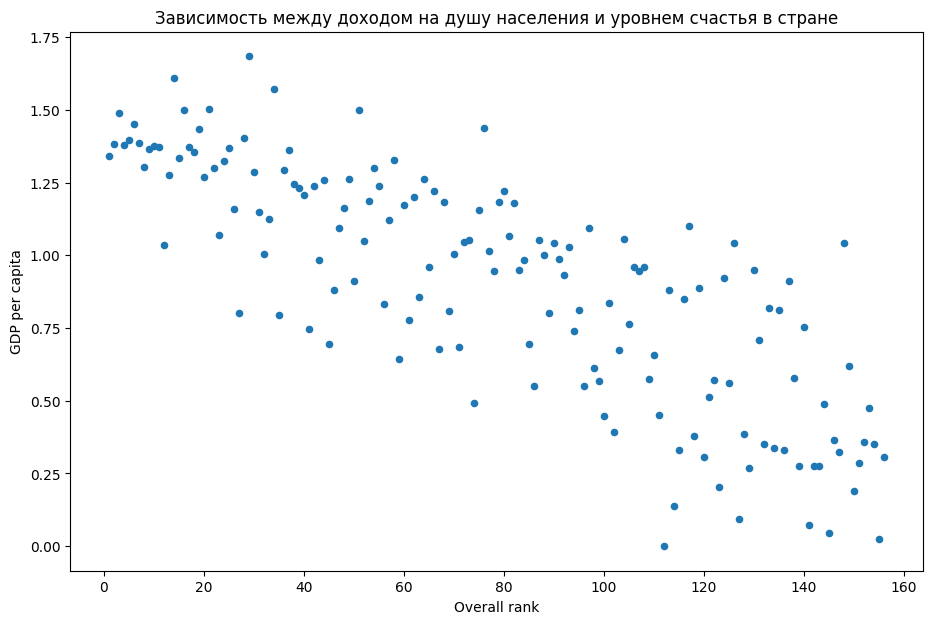

In [13]:
df_2019.plot(kind='scatter', 
        x='Overall rank', 
        y='GDP per capita', 
        title='Зависимость между доходом на душу населения и уровнем счастья в стране')

Посмотрим на распределение продолжительности здоровой жизни в мире. 
Видим, что большая часть сосредоточена на значении 0.8. 
Данное распределение трудно назвать нормальным вследствие того, что в мире из-за слишком разнящегося дохода на душу населения, уровня социальной поддержки, данный показетель также распределен ненормально.

<Axes: title={'center': 'Ожидаемая продолжительность здоровой жизни'}, ylabel='Frequency'>

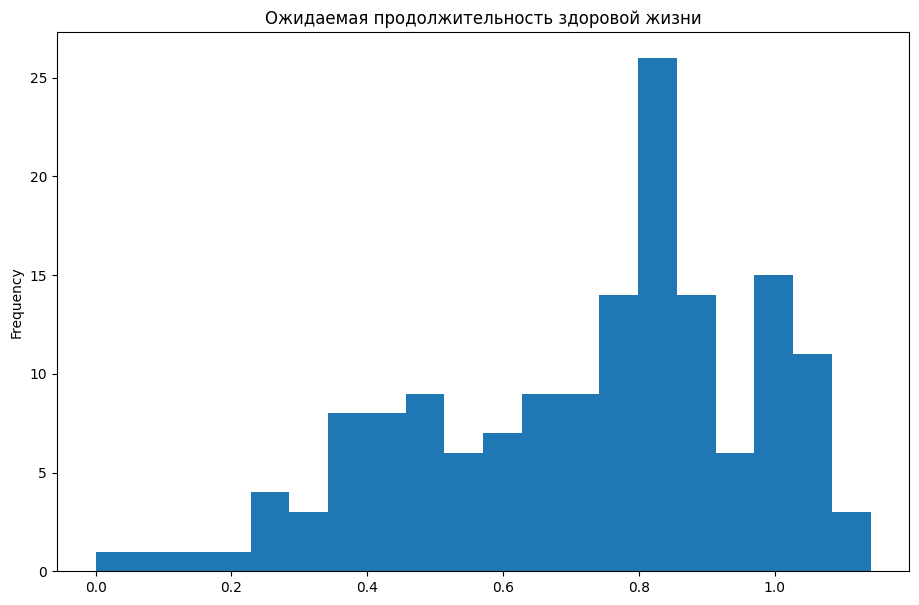

In [14]:
df_2019['Healthy life expectancy'].plot(kind='hist', 
                   title='Ожидаемая продолжительность здоровой жизни', bins=20)

Для того, чтобы посмотреть, какие факторы больше способствуют высокому рейтингу счастья для стран по всему миру, построим столбчатую диаграмму для наглядного сравнения. Видим, что наибольшее воздействее на уровень счастья в стране имеет уровень социальной поддержки.







<ipython-input-17-eec1089bb3c0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  factors_mean = df_2019.mean()


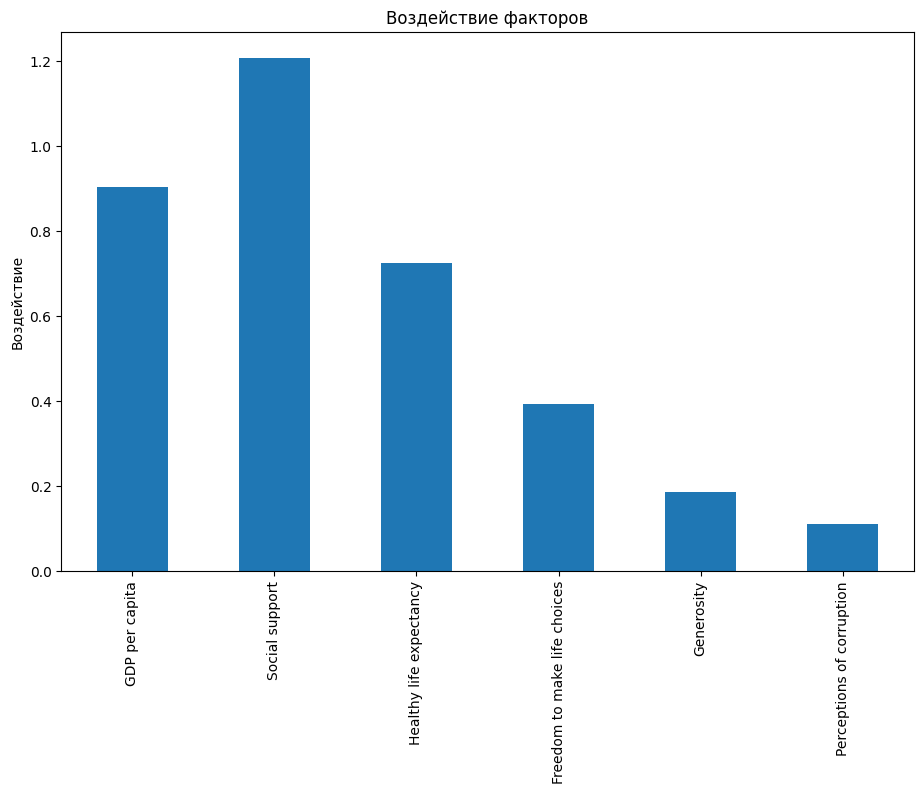

In [17]:
factors_mean = df_2019.mean()
factors_mean.iloc[2:].plot(kind="bar", stacked="True")
factors_mean.index.name = "Factors"
factors_mean
plt.xticks(rotation=90)
plt.ylabel("Воздействие")
plt.title("Воздействие факторов")
plt.show()

Так как какую-либо динамику по данному датасету отследить невозможно (нужно использовать join для того, чтобы объединить несколько датасетов для других годов), решила также построить не самую удачную круговую диаграмму, чтобы оценить отношение между значениями и степень их влияния на уровень счастья в стране-лидере - Финляндии. 
Видим, что уровень социальной поддержки и доход на душу населения имеют примерно одинаковое влияние на уровень счастья в стране.

<ipython-input-18-1762eae0f1a0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  factors_mean_2 = df_2019[df_2019["Country or region"]=="Finland"].mean()


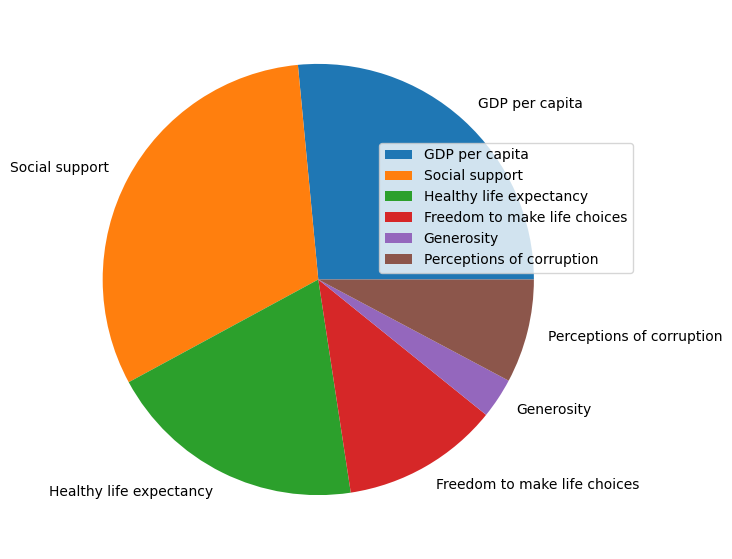

In [18]:
factors_mean_2 = df_2019[df_2019["Country or region"]=="Finland"].mean()
factors_mean_2.iloc[2:].plot(kind="pie")
plt.legend(bbox_to_anchor=(0.6, .5, 0.5, 0.5))